# Models for Overall Rating
## Data Preprocessing

In [72]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
df = pd.read_csv('clean.csv')
df.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Height in Cms,Weight in Pounds,Value in Pounds,Wage in Pounds
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,2202,Left,5.0,...,6.0,11.0,15.0,14.0,8.0,€226.5M,170.18,159,110500000.0,565000.0
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,2228,Right,5.0,...,7.0,11.0,15.0,14.0,11.0,€127.1M,187.96,183,77000000.0,405000.0
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,2143,Right,5.0,...,9.0,9.0,15.0,15.0,11.0,€228.1M,175.26,150,118500000.0,290000.0
3,3,De Gea,27,Spain,91,93,Manchester United,1471,Right,4.0,...,90.0,85.0,87.0,88.0,94.0,€138.6M,193.04,168,72000000.0,260000.0
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,2281,Right,4.0,...,15.0,13.0,5.0,10.0,13.0,€196.4M,180.34,154,102000000.0,355000.0


In [73]:
# Check type of predictor feature
print('Name and type of varialbes are: \n')
print(df.dtypes)
print('\nThe number of variables is %d' %len(df.columns))
print('...The number of categorical variables is %d' %(df.shape[1] - sum(df.dtypes=='float64') - sum(df.dtypes=='int64'))) # <- Count object type (Categorical variable) 
print('...The number of continuous variable is %d' %(sum(df.dtypes=='float64') + sum(df.dtypes=='int64'))) # <- Count float type (Continuos variable)

list_predictor_continuous = []
list_predictor_categorical = []

for name in df.columns[3:]:
    if df[name].dtype == 'float64' or df[name].dtype == 'int64':
        list_predictor_continuous.append(name)
    else:
        list_predictor_categorical.append(name)

print('List of continuous predictor:')
print(list_predictor_continuous)
print('List of categorical predictor:')
print(list_predictor_categorical)

Name and type of varialbes are: 

Unnamed: 0            int64
Name                 object
Age                   int64
Nationality          object
Overall               int64
                     ...   
Release Clause       object
Height in Cms       float64
Weight in Pounds      int64
Value in Pounds     float64
Wage in Pounds      float64
Length: 85, dtype: object

The number of variables is 85
...The number of categorical variables is 12
...The number of continuous variable is 73
List of continuous predictor:
['Overall', 'Potential', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'Sh

In [74]:
cat_features = ['Nationality', 'Club', 'Work Rate','Real Face']
features = ['ShortPassing','Dribbling','BallControl', 'Reactions','Interceptions', 'Positioning', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
import numpy as np
# Convert pd.serise to np.array
Rredictor_Categorical = df.loc[:,cat_features].values
Rredictor_Continuous = df.loc[:,features].values
Response_overall = df.loc[:,'Overall'].values 

# Integer Encoding for Categorical variable
enc_pred = OrdinalEncoder() # <- Keep this instance for inverse transform after prediction
Rredictor_Categorical_en = enc_pred.fit_transform(Rredictor_Categorical)

# MinMax Transform for Continuous variable
scaler_pred = MinMaxScaler() # <- Keep this instance for inverse transform after prediction
Rredictor = np.concatenate([Rredictor_Continuous, Rredictor_Categorical_en], axis = 1) # <- Include encoded categorical to make the same range
Rredictor_scaled = scaler_pred.fit_transform(Rredictor)
scaler_res = MinMaxScaler()
Response_overall_scaled = scaler_res.fit_transform(Response_overall.reshape(-1,1))


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Rredictor, Response_overall_scaled, test_size=0.30)

## Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
regressor = LinearRegression()
# fitting training set into object regressor
regressor.fit(X_train,y_train)

LinearRegression()

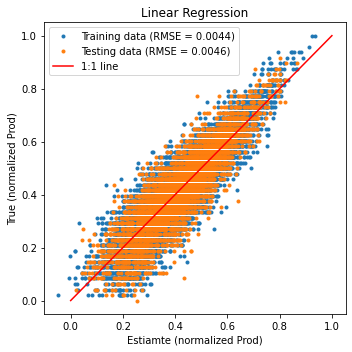

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# Estimate values for both training and testing data  
y_train_est = regressor.predict(X_train)
y_test_est = regressor.predict(X_test)
# Visualize Prediction performance using True vs. Estiamte plot
plt.figure(figsize = (5,5))
plt.plot(y_train_est, y_train,'.',label = 'Training data (RMSE = %.4f)' %mean_squared_error(y_train, y_train_est))
plt.plot(y_test_est, y_test, '.',label = 'Testing data (RMSE = %.4f)' %mean_squared_error(y_test, y_test_est))
plt.plot([0,1],[0,1],'-r',label = '1:1 line')
plt.title('Linear Regression')
plt.xlabel('Estiamte (normalized Prod)')
plt.ylabel('True (normalized Prod)')
plt.legend()
plt.tight_layout()

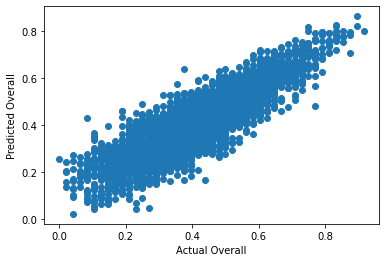

In [9]:
# Visualising Actual and predicted values of Potential of player
plt.scatter(y_test,y_test_est)
plt.xlabel("Actual Overall")
plt.ylabel("Predicted Overall")
plt.show()


In [10]:
from sklearn.metrics import r2_score
print('R2 score: '+str(r2_score(y_test, y_test_est)))

R2 score: 0.7718411811271374


## Random Forest Regression

In [11]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor()
random.fit(X_train, y_train)
y_pred_reg = random.predict(X_test)

<ipython-input-11-24ed841b9491>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random.fit(X_train, y_train)


In [12]:
from sklearn.metrics import r2_score
print('R2 score: '+str(r2_score(y_test, y_pred_reg)))

R2 score: 0.9102066180766509


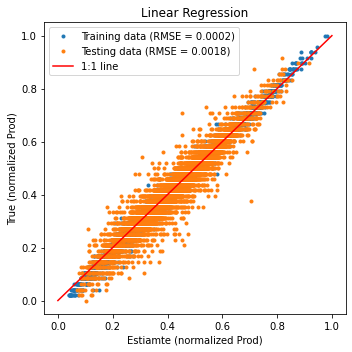

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# Estimate values for both training and testing data  
y_train_est = random.predict(X_train)
y_test_est = random.predict(X_test)
# Visualize Prediction performance using True vs. Estiamte plot
plt.figure(figsize = (5,5))
plt.plot(y_train_est, y_train,'.',label = 'Training data (RMSE = %.4f)' %mean_squared_error(y_train, y_train_est))
plt.plot(y_test_est, y_test, '.',label = 'Testing data (RMSE = %.4f)' %mean_squared_error(y_test, y_test_est))
plt.plot([0,1],[0,1],'-r',label = '1:1 line')
plt.title('Linear Regression')
plt.xlabel('Estiamte (normalized Prod)')
plt.ylabel('True (normalized Prod)')
plt.legend()
plt.tight_layout()

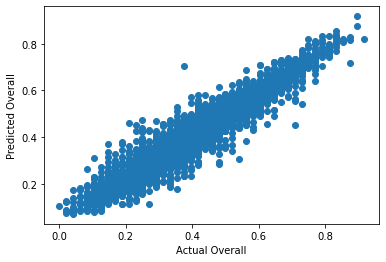

In [14]:
# Visualising Actual and predicted values of Potential of player
plt.scatter(y_test,y_pred_reg)
plt.xlabel("Actual Overall")
plt.ylabel("Predicted Overall")
plt.show()

# Ridge Regression

In [15]:
from sklearn.linear_model import Ridge 
  
# Train the model  
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(X_train, y_train) 
y_pred_rid = ridgeR.predict(X_test) 

In [16]:
print('R2 score: '+str(r2_score(y_test, y_pred_rid)))

R2 score: 0.771842167352832


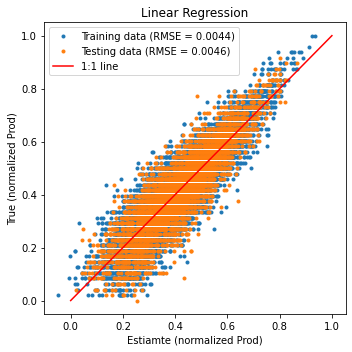

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# Estimate values for both training and testing data  
y_train_est = ridgeR.predict(X_train)
y_test_est = ridgeR.predict(X_test)
# Visualize Prediction performance using True vs. Estiamte plot
plt.figure(figsize = (5,5))
plt.plot(y_train_est, y_train,'.',label = 'Training data (RMSE = %.4f)' %mean_squared_error(y_train, y_train_est))
plt.plot(y_test_est, y_test, '.',label = 'Testing data (RMSE = %.4f)' %mean_squared_error(y_test, y_test_est))
plt.plot([0,1],[0,1],'-r',label = '1:1 line')
plt.title('Linear Regression')
plt.xlabel('Estiamte (normalized Prod)')
plt.ylabel('True (normalized Prod)')
plt.legend()
plt.tight_layout()

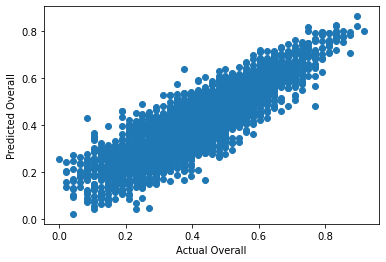

In [18]:
# Visualising Actual and predicted values of Potential of player
plt.scatter(y_test,y_pred_rid)
plt.xlabel("Actual Overall")
plt.ylabel("Predicted Overall")
plt.show()

# Lasso Regression

In [19]:
# import Lasso regression from sklearn library 
from sklearn.linear_model import Lasso 
  
# Train the model 
lasso = Lasso(alpha = 1) 
lasso.fit(X_train, y_train) 
y_pred_las = lasso.predict(X_test) 

In [20]:
print('R2 score: '+str(r2_score(y_test, y_pred_las)))

R2 score: 0.1681375044242397


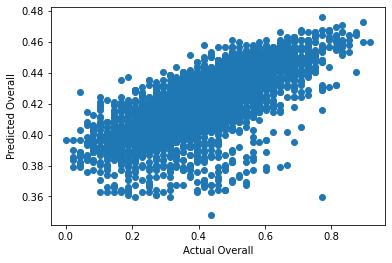

In [21]:
# Visualising Actual and predicted values of Potential of player
plt.scatter(y_test,y_pred_las)
plt.xlabel("Actual Overall")
plt.ylabel("Predicted Overall")
plt.show()

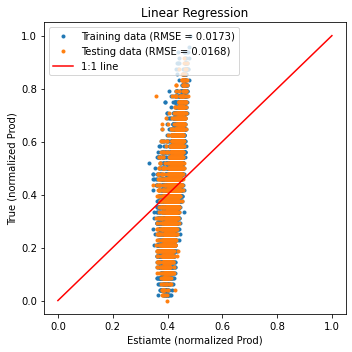

In [22]:
# Estimate values for both training and testing data  
y_train_est = lasso.predict(X_train)
y_test_est = lasso.predict(X_test)
# Visualize Prediction performance using True vs. Estiamte plot
plt.figure(figsize = (5,5))
plt.plot(y_train_est, y_train,'.',label = 'Training data (RMSE = %.4f)' %mean_squared_error(y_train, y_train_est))
plt.plot(y_test_est, y_test, '.',label = 'Testing data (RMSE = %.4f)' %mean_squared_error(y_test, y_test_est))
plt.plot([0,1],[0,1],'-r',label = '1:1 line')
plt.title('Linear Regression')
plt.xlabel('Estiamte (normalized Prod)')
plt.ylabel('True (normalized Prod)')
plt.legend()
plt.tight_layout()

### Conclusion for Overall Rating
The Random Forest Regression is the best model for Overall target variable. At the end I will implement the Random Forest Regression into the entire dataset. 

# Model for Work Rate

In [76]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
df = pd.read_csv('clean.csv')
df.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Height in Cms,Weight in Pounds,Value in Pounds,Wage in Pounds
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,2202,Left,5.0,...,6.0,11.0,15.0,14.0,8.0,€226.5M,170.18,159,110500000.0,565000.0
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,2228,Right,5.0,...,7.0,11.0,15.0,14.0,11.0,€127.1M,187.96,183,77000000.0,405000.0
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,2143,Right,5.0,...,9.0,9.0,15.0,15.0,11.0,€228.1M,175.26,150,118500000.0,290000.0
3,3,De Gea,27,Spain,91,93,Manchester United,1471,Right,4.0,...,90.0,85.0,87.0,88.0,94.0,€138.6M,193.04,168,72000000.0,260000.0
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,2281,Right,4.0,...,15.0,13.0,5.0,10.0,13.0,€196.4M,180.34,154,102000000.0,355000.0


In [77]:
# Check type of predictor feature
print('Name and type of varialbes are: \n')
print(df.dtypes)
print('\nThe number of variables is %d' %len(df.columns))
print('...The number of categorical variables is %d' %(df.shape[1] - sum(df.dtypes=='float64') - sum(df.dtypes=='int64'))) # <- Count object type (Categorical variable) 
print('...The number of continuous variable is %d' %(sum(df.dtypes=='float64') + sum(df.dtypes=='int64'))) # <- Count float type (Continuos variable)

list_predictor_continuous = []
list_predictor_categorical = []

for name in df.columns[3:]:
    if df[name].dtype == 'float64' or df[name].dtype == 'int64':
        list_predictor_continuous.append(name)
    else:
        list_predictor_categorical.append(name)

print('List of continuous predictor:')
print(list_predictor_continuous)
print('List of categorical predictor:')
print(list_predictor_categorical)

Name and type of varialbes are: 

Unnamed: 0            int64
Name                 object
Age                   int64
Nationality          object
Overall               int64
                     ...   
Release Clause       object
Height in Cms       float64
Weight in Pounds      int64
Value in Pounds     float64
Wage in Pounds      float64
Length: 85, dtype: object

The number of variables is 85
...The number of categorical variables is 12
...The number of continuous variable is 73
List of continuous predictor:
['Overall', 'Potential', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'Sh

In [78]:
cat_features = ['Nationality', 'Club', 'Position']
features = ['Stamina','SprintSpeed','BallControl','GKHandling', 'Positioning', 'ShortPassing', 'Aggression', 'Acceleration', 'SlidingTackle', 'Volleys']

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
import numpy as np
# Convert pd.serise to np.array
Rredictor_Categorical = df.loc[:,cat_features].values
Rredictor_Continuous = df.loc[:,features].values
Response_failtype = df.loc[:,'Work Rate'].values
Rredictor = np.concatenate([Rredictor_Continuous, Rredictor_Categorical_en], axis = 1)

# Integer Encoding for Categorical variable
enc_pred = OrdinalEncoder() # <- Keep this instance for inverse transform after prediction
Rredictor_Categorical_en = enc_pred.fit_transform(Rredictor_Categorical)
enc_res = OneHotEncoder()
Response_WR_en = enc_res.fit_transform(Response_failtype.reshape(-1,1)).todense()

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Rredictor, Response_WR_en, test_size=0.30, random_state=77777)

## Random Forest Clasifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=9, criterion='entropy', min_samples_split=3)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_split=3)

In [62]:
y_pred_WR = rf.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_WR))

0.3895295625114406


## Decision Tree Classifer

In [64]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()

In [65]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
y_pred_WRdt = dt.predict(X_test)

In [67]:
print(accuracy_score(y_test, y_pred_WRdt))

0.45011898224418817


## TensorFlow Neural Network

In [80]:
Rredictor_scaled = scaler_pred.fit_transform(Rredictor)

In [81]:
# Tensorflow 2.1.0 version 
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [82]:
from tensorflow.keras import *

In [83]:
# Define Input and Output shape
input_shape = (Rredictor_scaled.shape[-1],)
n_class = Response_WR_en.shape[-1]

# Build a Neural Network
model = Sequential()
model.add(Dense(40,activation='relu',input_shape=input_shape))
model.add(Dense(40,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(n_class, activation='softmax'))

# Compile the Neural Network - define Loss and optimizer to tune the associated weights
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [84]:
# training the Neural Network and saving metrics every 100 epochs
history = model.fit(X_train, y_train,
          batch_size=50, epochs=100,
          verbose=2,
          validation_data=(X_test, y_test))

Epoch 1/100
255/255 - 1s - loss: 2.6683 - accuracy: 0.4665 - val_loss: 1.5415 - val_accuracy: 0.4604
Epoch 2/100
255/255 - 1s - loss: 1.3326 - accuracy: 0.5439 - val_loss: 1.2676 - val_accuracy: 0.5680
Epoch 3/100
255/255 - 0s - loss: 1.0592 - accuracy: 0.6480 - val_loss: 0.9666 - val_accuracy: 0.6617
Epoch 4/100
255/255 - 0s - loss: 0.7750 - accuracy: 0.7331 - val_loss: 0.7143 - val_accuracy: 0.7373
Epoch 5/100
255/255 - 0s - loss: 0.6077 - accuracy: 0.7832 - val_loss: 0.5381 - val_accuracy: 0.8159
Epoch 6/100
255/255 - 0s - loss: 0.4693 - accuracy: 0.8284 - val_loss: 0.5046 - val_accuracy: 0.8250
Epoch 7/100
255/255 - 0s - loss: 0.4017 - accuracy: 0.8520 - val_loss: 0.3604 - val_accuracy: 0.8680
Epoch 8/100
255/255 - 0s - loss: 0.3259 - accuracy: 0.8834 - val_loss: 0.3148 - val_accuracy: 0.8869
Epoch 9/100
255/255 - 0s - loss: 0.3081 - accuracy: 0.8853 - val_loss: 0.3208 - val_accuracy: 0.8757
Epoch 10/100
255/255 - 0s - loss: 0.2549 - accuracy: 0.9051 - val_loss: 0.2499 - val_accura

Epoch 82/100
255/255 - 0s - loss: 0.0384 - accuracy: 0.9863 - val_loss: 0.0626 - val_accuracy: 0.9791
Epoch 83/100
255/255 - 0s - loss: 0.0592 - accuracy: 0.9771 - val_loss: 0.1300 - val_accuracy: 0.9550
Epoch 84/100
255/255 - 0s - loss: 0.0709 - accuracy: 0.9772 - val_loss: 0.0561 - val_accuracy: 0.9824
Epoch 85/100
255/255 - 0s - loss: 0.0416 - accuracy: 0.9862 - val_loss: 0.0633 - val_accuracy: 0.9793
Epoch 86/100
255/255 - 0s - loss: 0.0361 - accuracy: 0.9872 - val_loss: 0.0605 - val_accuracy: 0.9773
Epoch 87/100
255/255 - 0s - loss: 0.1488 - accuracy: 0.9531 - val_loss: 0.0715 - val_accuracy: 0.9800
Epoch 88/100
255/255 - 0s - loss: 0.0419 - accuracy: 0.9871 - val_loss: 0.0747 - val_accuracy: 0.9771
Epoch 89/100
255/255 - 0s - loss: 0.0418 - accuracy: 0.9852 - val_loss: 0.0532 - val_accuracy: 0.9813
Epoch 90/100
255/255 - 0s - loss: 0.0352 - accuracy: 0.9887 - val_loss: 0.0514 - val_accuracy: 0.9810
Epoch 91/100
255/255 - 0s - loss: 0.1035 - accuracy: 0.9683 - val_loss: 0.1856 - v

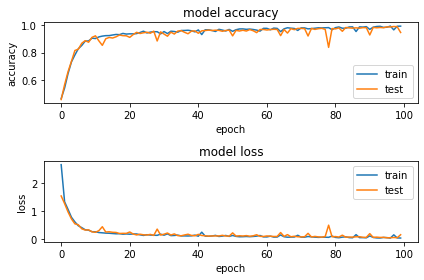

In [85]:
import matplotlib.pyplot as plt
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## Conclusion for Work Rate

The Neural Network has the best accuracy and a low loss for the work rate predictions. Below I will add both predicted models to the new data set and see the players with highest overall and work rate scores to be the players that are the highest in demand. 

# Models For Dataset

**HAD TO RESTART RANDOM FOREST REGRESSION FOR NEW DATAFRAME**

In [118]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
df = pd.read_csv('clean.csv')
df.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Height in Cms,Weight in Pounds,Value in Pounds,Wage in Pounds
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,2202,Left,5.0,...,6.0,11.0,15.0,14.0,8.0,€226.5M,170.18,159,110500000.0,565000.0
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,2228,Right,5.0,...,7.0,11.0,15.0,14.0,11.0,€127.1M,187.96,183,77000000.0,405000.0
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,2143,Right,5.0,...,9.0,9.0,15.0,15.0,11.0,€228.1M,175.26,150,118500000.0,290000.0
3,3,De Gea,27,Spain,91,93,Manchester United,1471,Right,4.0,...,90.0,85.0,87.0,88.0,94.0,€138.6M,193.04,168,72000000.0,260000.0
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,2281,Right,4.0,...,15.0,13.0,5.0,10.0,13.0,€196.4M,180.34,154,102000000.0,355000.0


In [119]:
# Check type of predictor feature
print('Name and type of varialbes are: \n')
print(df.dtypes)
print('\nThe number of variables is %d' %len(df.columns))
print('...The number of categorical variables is %d' %(df.shape[1] - sum(df.dtypes=='float64') - sum(df.dtypes=='int64'))) # <- Count object type (Categorical variable) 
print('...The number of continuous variable is %d' %(sum(df.dtypes=='float64') + sum(df.dtypes=='int64'))) # <- Count float type (Continuos variable)

list_predictor_continuous = []
list_predictor_categorical = []

for name in df.columns[3:]:
    if df[name].dtype == 'float64' or df[name].dtype == 'int64':
        list_predictor_continuous.append(name)
    else:
        list_predictor_categorical.append(name)

print('List of continuous predictor:')
print(list_predictor_continuous)
print('List of categorical predictor:')
print(list_predictor_categorical)

Name and type of varialbes are: 

Unnamed: 0            int64
Name                 object
Age                   int64
Nationality          object
Overall               int64
                     ...   
Release Clause       object
Height in Cms       float64
Weight in Pounds      int64
Value in Pounds     float64
Wage in Pounds      float64
Length: 85, dtype: object

The number of variables is 85
...The number of categorical variables is 12
...The number of continuous variable is 73
List of continuous predictor:
['Overall', 'Potential', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'Sh

In [120]:
cat_features = ['Nationality', 'Club', 'Work Rate','Real Face']
features = ['ShortPassing','Dribbling','BallControl', 'Reactions','Interceptions', 'Positioning', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
import numpy as np
# Convert pd.serise to np.array
Rredictor_Categorical = df.loc[:,cat_features].values
Rredictor_Continuous = df.loc[:,features].values
Response_overall = df.loc[:,'Overall'].values 

# Integer Encoding for Categorical variable
enc_pred = OrdinalEncoder() # <- Keep this instance for inverse transform after prediction
Rredictor_Categorical_en = enc_pred.fit_transform(Rredictor_Categorical)

# MinMax Transform for Continuous variable
scaler_pred = MinMaxScaler() # <- Keep this instance for inverse transform after prediction
Rredictor = np.concatenate([Rredictor_Continuous, Rredictor_Categorical_en], axis = 1) # <- Include encoded categorical to make the same range
Rredictor_scaled = scaler_pred.fit_transform(Rredictor)
scaler_res = MinMaxScaler()
Response_overall_scaled = scaler_res.fit_transform(Response_overall.reshape(-1,1))

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Rredictor, Response_overall_scaled, test_size=0.30)

In [122]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor()
random.fit(X_train, y_train)

<ipython-input-122-ae53d479a1e1>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random.fit(X_train, y_train)


RandomForestRegressor()

In [123]:
X = Rredictor

In [124]:
y_pred_regfinal = random.predict(X)

In [125]:
y_pred_rffinal = pd.DataFrame(y_pred_regfinal)

In [126]:
df['Overall Score'] = y_pred_rffinal * 100

In [127]:
df = df.drop(['Overall'], axis=1)

In [128]:
df.head()

,Unnamed: 0,Name,Age,Nationality,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Height in Cms,Weight in Pounds,Value in Pounds,Wage in Pounds,Overall Score
0,0,L. Messi,31,Argentina,94,FC Barcelona,2202,Left,5.0,4.0,...,11.0,15.0,14.0,8.0,€226.5M,170.18,159,110500000.0,565000.0,96.875000
1,1,Cristiano Ronaldo,33,Portugal,94,Juventus,2228,Right,5.0,4.0,...,11.0,15.0,14.0,11.0,€127.1M,187.96,183,77000000.0,405000.0,93.125000
2,2,Neymar Jr,26,Brazil,93,Paris Saint-Germain,2143,Right,5.0,5.0,...,9.0,15.0,15.0,11.0,€228.1M,175.26,150,118500000.0,290000.0,92.625000
3,3,De Gea,27,Spain,93,Manchester United,1471,Right,4.0,3.0,...,85.0,87.0,88.0,94.0,€138.6M,193.04,168,72000000.0,260000.0,86.166667
4,4,K. De Bruyne,27,Belgium,92,Manchester City,2281,Right,4.0,5.0,...,13.0,5.0,10.0,13.0,€196.4M,180.34,154,102000000.0,355000.0,92.354167


**NEURAL NETWORK CLASSIFER DATASET**

In [129]:
y_pred_NN = model.predict(X)

In [130]:
y_pred_NN = enc_res.inverse_transform(y_pred_NN)

In [131]:
df['Work Rate of Players'] = pd.DataFrame(y_pred_NN)

In [132]:
df = df.drop(['Work Rate'], axis=1)

In [133]:
df.head()

,Unnamed: 0,Name,Age,Nationality,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,...,GKKicking,GKPositioning,GKReflexes,Release Clause,Height in Cms,Weight in Pounds,Value in Pounds,Wage in Pounds,Overall Score,Work Rate of Players
0,0,L. Messi,31,Argentina,94,FC Barcelona,2202,Left,5.0,4.0,...,15.0,14.0,8.0,€226.5M,170.18,159,110500000.0,565000.0,96.875000,Medium/ High
1,1,Cristiano Ronaldo,33,Portugal,94,Juventus,2228,Right,5.0,4.0,...,15.0,14.0,11.0,€127.1M,187.96,183,77000000.0,405000.0,93.125000,High/ Low
2,2,Neymar Jr,26,Brazil,93,Paris Saint-Germain,2143,Right,5.0,5.0,...,15.0,15.0,11.0,€228.1M,175.26,150,118500000.0,290000.0,92.625000,High/ Medium
3,3,De Gea,27,Spain,93,Manchester United,1471,Right,4.0,3.0,...,87.0,88.0,94.0,€138.6M,193.04,168,72000000.0,260000.0,86.166667,Medium/ Medium
4,4,K. De Bruyne,27,Belgium,92,Manchester City,2281,Right,4.0,5.0,...,5.0,10.0,13.0,€196.4M,180.34,154,102000000.0,355000.0,92.354167,High/ High


# Best Players based on Overall Score and Work Rate
These are the top 10 players in the 2019 league ranked in order from overall score and work rate

In [135]:
best_player = df.sort_values(['Overall Score', 'Work Rate of Players'], ascending = False)[['Overall Score' , 'Name' , 'Work Rate of Players' , 'Nationality' , 'Position']].head(10)
best_player.set_index('Name' , inplace = True)
best_player

,Overall Score,Work Rate of Players,Nationality,Position
Name,,,,
L. Messi,96.875000,Medium/ High,Argentina,RF
E. Hazard,93.187500,High/ Medium,Belgium,LF
Cristiano Ronaldo,93.125000,High/ Low,Portugal,ST
Neymar Jr,92.625000,High/ Medium,Brazil,LW
L. Suárez,92.375000,High/ Medium,Uruguay,RS
K. De Bruyne,92.354167,High/ High,Belgium,RCM
L. Modrić,92.312500,High/ High,Croatia,RCM
David Silva,92.083333,High/ Medium,Spain,LCM
S. Agüero,91.479167,High/ Medium,Argentina,ST


In [139]:
xt = df

In [140]:
xt.to_csv("Predicted_FIFA.csv")